# unit 1.6 - learning curve fitting

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/culurciello/deep-learning-course-source/blob/main/source/lectures/16-curve-fit.ipynb)

In this example we try to find a polynomial to fit a formula - like a Taylor expansion.

let us try to learn a function of the form $y = a + b * x + c * x^2 + d * x^3$

Inspired by [this example](https://vamsibrp.github.io/pytorch-learning-tutorial/).

In [1]:
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
import math

x = torch.linspace(-math.pi, math.pi, 100) # 1000 equally spaced points between -pi and pi
y = 1/2*x+1 # a simple linear function - this is the data to fit!

# a 4th order polynomial: y = a + b x + c x^2 + d x^3
p = torch.tensor([1,2,3,4]) # powers of x
xx = x.unsqueeze(-1).pow(p) # x^1, x^2, x^3, x^4
# we need to find the coefficients a, b, c, d

# defining the model that will fit the data
class myModel(torch.nn.Module):
    def __init__(self):
        super(myModel, self).__init__()
        self.linear1 = torch.nn.Linear(p.shape[0], 1)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.flatten(x)
        return x
    

model = myModel()
loss_func = torch.nn.MSELoss()
optimiser = torch.optim.Adam(model.parameters())

for t in range(1,10001):
    y_pred = model(xx)
    loss = loss_func(y_pred,y)
    if t%1000 == 0:
        print(t,loss.item())
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

1000 0.09462868422269821
2000 0.00916474498808384
3000 0.00023628646158613265
4000 1.2055928664267412e-06
5000 3.0542799400734566e-09
6000 8.613838808901875e-12
7000 3.0131630697483036e-12
8000 1.0251710504810552e-12
9000 3.58078014938909e-13
10000 1.2057909737957923e-13


learned parameters a,b,c,d: tensor([[ 5.0000e-01, -2.8331e-07,  2.0924e-08,  2.6097e-08]]) tensor([1.0000])


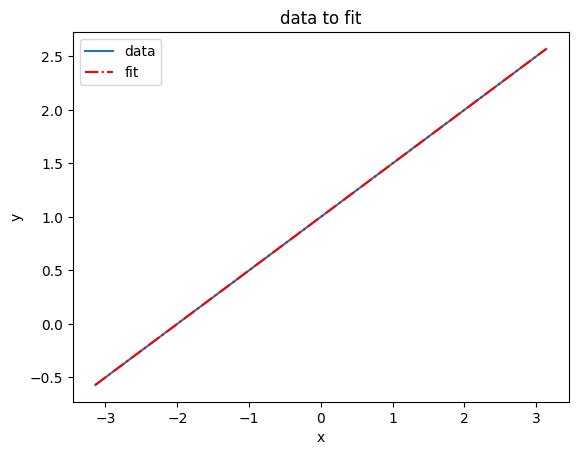

In [2]:
abcd = model.linear1.weight.detach()
bias = model.linear1.bias.detach()
print("learned parameters a,b,c,d:", abcd, bias)

y_pred = (xx*abcd).sum(1).add(bias) # predictor function
plt.plot(x, y, x, y_pred, 'r-.')
plt.title('data to fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['data', 'fit'])
plt.show()

it found coefficient of the polynomial $y = a + b * x + c * x^2 + d * x^3$

In this case b = 0.5, rest are 0
The bias was 1, so a = 1

This is basically a model of the line: $y = 1 + 0.5*x$

## next step

Now we can do the same thing but for a more complex nonlinear function - sin(x)

In [3]:
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
import math

x = torch.linspace(-math.pi, math.pi, 100) # 100 equally spaced points between -pi and pi
y = torch.sin(x) # this is the data to fit!

# a 4th order polynomial: y = a + b x + c x^2 + d x^3
p = torch.tensor([1,2,3,4]) # powers of x
xx = x.unsqueeze(-1).pow(p) # x^1, x^2, x^3, x^4
# we need to find the coefficients a, b, c, d

# defining the model that will fit the data
class myModel(torch.nn.Module):
    def __init__(self):
        super(myModel, self).__init__()
        self.linear1 = torch.nn.Linear(p.shape[0], 1)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.flatten(x)
        return x

# training the model
model = myModel()
loss_func = torch.nn.MSELoss()
optimiser = torch.optim.Adam(model.parameters())

for t in range(1,10001):
    y_pred = model(xx)
    loss = loss_func(y_pred,y)
    if t%1000 == 0:
        print(t,loss.item())
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

1000 0.2571175694465637
2000 0.0643572136759758
3000 0.020802780985832214
4000 0.012529169209301472
5000 0.008727134205400944
6000 0.006091308780014515
7000 0.00497552752494812
8000 0.004766870755702257
9000 0.004755954258143902
10000 0.004755879752337933


learned parameters a,b,c,d: tensor([[ 8.5221e-01, -4.7944e-06, -9.2267e-02,  4.9948e-07]]) tensor([6.4763e-06])


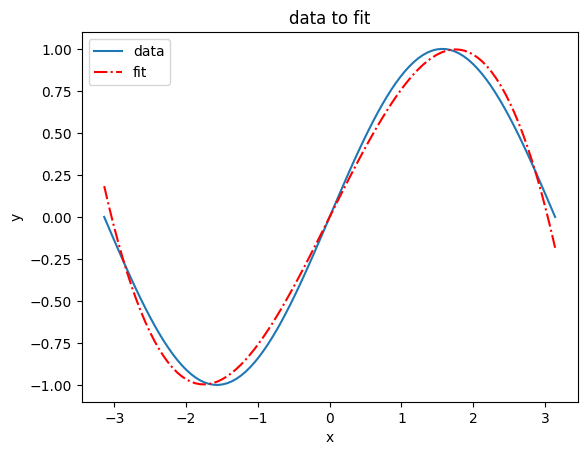

In [5]:
abcd = model.linear1.weight.detach()
bias = model.linear1.bias.detach()
print("learned parameters a,b,c,d:", abcd, bias)

y_pred = (xx*abcd).sum(1).add(bias) # predictor function
plt.plot(x, y, x, y_pred, 'r-.')
plt.title('data to fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['data', 'fit'])
plt.show()